<a href="https://colab.research.google.com/github/Scodingcurriculum/Artificial-Intelligence-C56/blob/main/L14(Color_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless

In [ ]:
!pip install nltk

In [ ]:
!pip install seaborn

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Saving 2.jpg to 2 (1).jpg


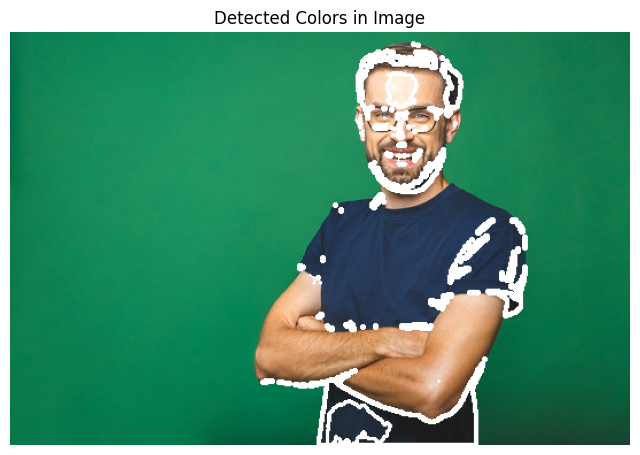

Text Description: I love the bright colors! The red is my favorite.
Sentiment Analysis Scores: {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.8858}
    Color  Count
0     Red      1
1   Green      0
2    Blue      0
3  Yellow      0
4   Black   5411
5   White   6353


<ipython-input-4-c95c4b5f5ae6>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Color', y='Count', data=color_counts_df, palette='Set2')


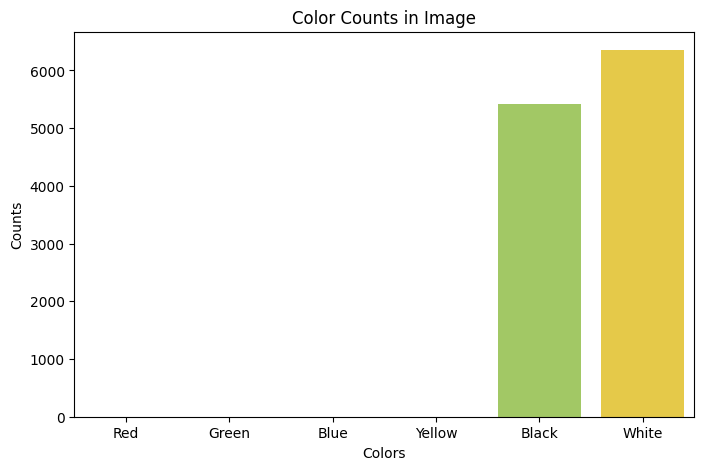

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Define the function to detect colors in an image
def detect_colors(image_path):
    # Read the image
    image = cv2.imread("2.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define color boundaries
    colors = {
        "Red": ([200, 0, 0], [255, 100, 100]),
        "Green": ([0, 200, 0], [100, 255, 100]),
        "Blue": ([0, 0, 200], [100, 100, 255]),
        "Yellow": ([200, 200, 0], [255, 255, 100]),
        "Black": ([0, 0, 0], [50, 50, 50]),
        "White": ([200, 200, 200], [255, 255, 255])
    }

    # Initialize a dictionary to hold color counts
    color_counts = {color: 0 for color in colors.keys()}

    # Loop through the color boundaries
    for color, (lower, upper) in colors.items():
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")

        # Create a mask for the color
        mask = cv2.inRange(image, lower, upper)
        color_counts[color] = cv2.countNonZero(mask)

        # Find contours and draw them on the image
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            cv2.drawContours(image, [contour], -1, (255, 255, 255), 2)

    # Display the image with detected colors
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title('Detected Colors in Image')
    plt.show()

    return color_counts

# Define the function for sentiment analysis
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

# Sample image (upload an image using the file upload option in Colab)
from google.colab import files
uploaded = files.upload()

# Assuming only one image is uploaded
image_path = next(iter(uploaded.keys()))

# Detect colors in the uploaded image
color_counts = detect_colors("2.jpg")

# Short text description for sentiment analysis
text_description = "I love the bright colors! The red is my favorite."
print("Text Description:", text_description)

# Analyze sentiment
sentiment_scores = analyze_sentiment(text_description)
print("Sentiment Analysis Scores:", sentiment_scores)

# Create a DataFrame for visualization
import pandas as pd

color_counts_df = pd.DataFrame(color_counts.items(), columns=['Color', 'Count'])
print(color_counts_df)

# Visualize color counts using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Color', y='Count', data=color_counts_df, palette='Set2')
plt.title('Color Counts in Image')
plt.xlabel('Colors')
plt.ylabel('Counts')
plt.show()